# Getting Started with PauliwordOp

The Pauli spin matrices $\{X, Y, Z \}$ are defined as:

$$X = \begin{bmatrix}
0 & 1\\ 
1 & 0
\end{bmatrix}$$

$$Y = \begin{bmatrix}
0 & -1i\\ 
1i & 0
\end{bmatrix}$$

$$Z = \begin{bmatrix}
1 & 0\\ 
0 & -1
\end{bmatrix}$$

A Pauli operator $P_{i}$ is defined as an $n$-fold tensor products of such single qubit Pauli matrices. We can write this as:

$$P_{i} = \bigotimes_{k=0}^{n-1} \sigma_{i} = \sigma_{0} \otimes \sigma_{1}  \otimes ... \otimes \sigma_{n-1}$$



The `PauliwordOp` class is used to describe arbitrary linear combination of Pauli operators and provide useful manipulation functions.

## Initialization

First we need to import `PauliwordOp`

In [1]:
from symmer import PauliwordOp

We can then initialize a Pauli operator via the following methods:
1. `from_list`
2. `from_dictionary`
3. `from_matrix`
4. `random`
5. `haar_random`
6. `from_qiskit`
7. `from_openfermion`
8. `empty`

In [2]:
term_list = ['ZI', 'ZZ', 'ZX', 'YZ', 'XX', 'XY']
coeffs = [1,2,3,4,5,6]

PauliwordOp.from_list(term_list,
                      coeffs)

 1.000+0.000j ZI +
 2.000+0.000j ZZ +
 3.000+0.000j ZX +
 4.000+0.000j YZ +
 5.000+0.000j XX +
 6.000+0.000j XY

In [3]:
term_dict = {'ZI': (1+0j),
 'ZZ': (2+0j),
 'ZX': (3+0j),
 'YZ': (4+0j),
 'XX': (5+0j),
 'XY': (6+0j)}
             
PauliwordOp.from_dictionary(term_dict)

 1.000+0.000j ZI +
 2.000+0.000j ZZ +
 3.000+0.000j ZX +
 4.000+0.000j YZ +
 5.000+0.000j XX +
 6.000+0.000j XY

The `from_matrix` has two methods:
- projector: builds operator by matrix elements
- full_basis: builds operator by searching over basis of Pauli operators (size $4^{n}$)

In [4]:
import numpy as np

mat = np.array([[ 3.+0.j,  3.+0.j,  0.-4.j,  5.-6.j],
                   [ 3.+0.j, -1.+0.j,  5.+6.j,  0.+4.j],
                   [ 0.+4.j,  5.-6.j, -3.+0.j, -3.+0.j],
                   [ 5.+6.j,  0.-4.j, -3.+0.j,  1.+0.j]])

PauliwordOp.from_matrix(mat, 
                        strategy='projector',
                        disable_loading_bar=True)

 1.000+0.000j ZI +
 2.000+0.000j ZZ +
 3.000+0.000j ZX +
 4.000+0.000j YZ +
 5.000+0.000j XX +
 6.000+0.000j XY

In [5]:
from tqdm.notebook import tqdm

PauliwordOp.from_matrix(mat, 
                        strategy='full_basis',
                        disable_loading_bar=False)

Building operator via full basis:   0%|          | 0/16 [00:00<?, ?it/s]

 1.000+0.000j ZI +
 2.000+0.000j ZZ +
 3.000+0.000j ZX +
 4.000-0.000j YZ +
 5.000+0.000j XX +
 6.000-0.000j XY

The `random` initalization method allows a user to define the number of qubits, terms and whether it is a diagonal operator and has complex coefficents:

In [6]:
n_qubits= 3
n_terms = 8
random = PauliwordOp.random(n_qubits, 
                             n_terms,
                               diagonal=False,
                               complex_coeffs=False)

random

-0.820+0.000j IIX +
 1.366+0.000j ZZI +
-0.235+0.000j YII +
 0.592+0.000j IZX +
 0.716+0.000j XIX +
 1.592+0.000j IXZ +
-0.621+0.000j ZZZ +
 0.397+0.000j III

```{note}
random method can generate repeated Pauli operators!
```

The `haar_random` initalization method builds a PauliwordOp of a untiary taken from the Haar distribution (i.e. a random unitary). Note this first generate a Haar random unitary and then uses the `from_matrix` method.

In [7]:
import networkx as nx

n_qubits= 2
haar_random = PauliwordOp.haar_random(n_qubits, 
                                disable_loading_bar=True)

haar_random

-0.373+0.044j II +
 0.080-0.072j IZ +
-0.035-0.157j ZI +
-0.255-0.073j ZZ +
-0.177+0.269j IX +
-0.089-0.031j IY +
-0.200-0.091j ZX +
 0.032-0.025j ZY +
 0.127-0.077j XI +
 0.012-0.034j XZ +
-0.396+0.089j YI +
 0.010+0.140j YZ +
-0.106+0.169j XX +
 0.092+0.274j XY +
 0.074-0.484j YX +
 0.035-0.128j YY

In [8]:
from qiskit.opflow import PauliSumOp 

ibm_op = PauliSumOp.from_list([('XX', 1), ('YY', 2)])

P = PauliwordOp.from_qiskit(ibm_op)

print(f'IBM op:')
print(ibm_op, '\n')

print(f'symmer op:')
print(P)

IBM op:
1.0 * XX
+ 2.0 * YY 

symmer op:
 1.000+0.000j XX +
 2.000+0.000j YY


In [9]:
from openfermion import QubitOperator

of_op = QubitOperator('X0 X1', 1) + QubitOperator('Y0 Y1', 2)

P = PauliwordOp.from_openfermion(of_op)

print(f'openfermion op:')
print(of_op, '\n')

print(f'symmer op:')
print(P)

openfermion op:
1 [X0 X1] +
2.0 [Y0 Y1] 

symmer op:
 1.000+0.000j XX +
 2.000+0.000j YY


An empty Pauliword can be initizalized as follows:

In [10]:
n_qubits = 2
empty = PauliwordOp.empty(n_qubits)
empty

 0.000+0.000j II

This can be useful if we want to add terms to a given variable (without having to define it during).

## Basic mathematical operations

### Addition

Addition is performed between `PauliwordOp` using the standard `+` operator:

In [11]:
P1 = PauliwordOp.from_dictionary({
                                 'ZI': (1+0j),
                                 'ZZ': (2+0j)}
                                )

P2 = PauliwordOp.from_dictionary({
                                 'XX': (1+0j),
                                 'YY': (2+0j)}
                                )

P_add = P1 + P2
P_add

 1.000+0.000j ZI +
 2.000+0.000j ZZ +
 1.000+0.000j XX +
 2.000+0.000j YY

And a new `PauliwordOp` is returned

```{note}
You can only add PauliwordOp operators with the SAME number of qubits.
```

### Multiplication

Multiplication is performed between `PauliwordOp` using the standard `*` operator:

In [12]:
P_mult = P1 * P2
P_mult

-4.000+0.000j XX +
 0.000-2.000j XY +
 0.000+1.000j YX +
-2.000+0.000j YY

And a new `PauliwordOp` is returned

```{note}
As with addition, you can only multiply PauliwordOp operators with the SAME number of qubits.
```

To multiply a PauliwordOp by a constant we recommend using:

In [13]:
P1.multiply_by_constant(4)
P1

 1.000+0.000j ZI +
 2.000+0.000j ZZ

### Commutativity

We can find the commutation properties between Pauli operators within a `PauliwordOp` by:

In [14]:
P = PauliwordOp.from_list(['XX', 'YY', 'ZX'])
print(P.adjacency_matrix)

[[ True  True False]
 [ True  True  True]
 [False  True  True]]


This is more commonly known as the adjacency_matrix.

We can also find the commutatation properties between terms of two different 'PauliwordOp' operators via

In [15]:
# termwise commutativy
P1 = PauliwordOp.from_list(['ZZ', 'ZI'])
P2 = PauliwordOp.from_list(['XX', 'YY', 'ZX'])
print(P1.commutes_termwise(P2))

[[ True  True False]
 [False False  True]]


We see that:
- `ZZ` commutes with all terms in `P2` apart from `ZX`
- `ZI` anticommutes with all terms in `P2` apart from `ZX` which it commutes with

Finally, we can also find commutativity relations between operators. Operators $A$ and $B$ commute if:

$$[A,B] = AB - BA  = 0$$

In [16]:
# termwise commutativy
A = PauliwordOp.from_list(['ZZ'])
B = PauliwordOp.from_list(['XX', 'YY'])

A.commutes(B)

True

In [17]:
A = PauliwordOp.from_list(['ZZ'])
B = PauliwordOp.from_list(['XI'])

A.commutes(B)

False

```{note}
Note the difference between: commutes and commutes_termwise
```

### Tensoring PauliwordOps

We can tensor PauliwordOps as follows:

In [18]:
P1 = PauliwordOp.from_list(['X'], [1 + 1j])
P2 = PauliwordOp.from_list(['Z'], [2])

print(P1.tensor(P2))

 2.000+2.000j XZ


... which includes linear combinations defined over different numbers of qubits:

In [19]:
P1 = PauliwordOp.from_list(['XIY', 'ZXY'], [2+1j, 3+5j])
P2 = PauliwordOp.from_list(['ZZ', 'XY'], [3+2j, 1+8j])

print(P1.tensor(P2))

-1.000+21.000j ZXYZZ +
-37.000+29.000j ZXYXY +
 4.000+7.000j XIYZZ +
-6.000+17.000j XIYXY


## Exporting to different representations

Given the following Pauli operator `op`:

In [20]:
op = PauliwordOp.from_dictionary(
    {
        'XX':1,
        'ZZ':2 + 1j,
        'II':3
    }
)
print(op)

 1.000+0.000j XX +
 2.000+1.000j ZZ +
 3.000+0.000j II


We can convert it into a scipy `csr` matrix via the `to_sparse_matrix` method:

In [21]:
op_sparse_matrix = op.to_sparse_matrix

print(type(op_sparse_matrix))
print(op_sparse_matrix)

<class 'scipy.sparse._csr.csr_matrix'>
  (0, 0)	(5+1j)
  (0, 3)	(1+0j)
  (1, 1)	(1-1j)
  (1, 2)	(1+0j)
  (2, 1)	(1+0j)
  (2, 2)	(1-1j)
  (3, 0)	(1+0j)
  (3, 3)	(5+1j)


We can use the `toarray` of `scipy.sparse._csr.csr_matrix` to make this a dense matrix

In [22]:
print(op_sparse_matrix.toarray())

[[5.+1.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 1.-1.j 1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 1.-1.j 0.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 5.+1.j]]


We tabulate the operator into a pandas dataframe (`pandas.core.frame.DataFrame`)

In [23]:
dataframe = op.to_dataframe
dataframe

,Pauli terms,Coefficients (real),Coefficients (imaginary)
0,II,1.0,0.0
1,ZZ,2.0,1.0
2,XX,3.0,0.0


We can also output the operator to different backends such as to openfermion:

In [24]:
op.to_openfermion

(3+0j) [] +
(1+0j) [X0 X1] +
(2+1j) [Z0 Z1]

and qiskit:

In [25]:
op.to_qiskit

PauliSumOp(SparsePauliOp(['II', 'ZZ', 'XX'],
              coeffs=[3.+0.j, 2.+1.j, 1.+0.j]), coeff=1.0)

and to a simple dictionary:

In [26]:
op.to_dictionary

{'II': (3+0j), 'ZZ': (2+1j), 'XX': (1+0j)}

PauliwordOp also has graph functionality:
1. Nodes / Vertices are used to represent Pauli operators
2. Edges are used to represent a defined commutation relation between Pauli operators

In [27]:
op = PauliwordOp.from_dictionary({
 'III': (0.44635739706240757+0j),
 'IZI': (-1.3319405851037809+0j),
 'IZZ': (1.0470696736027791+0j),
 'ZIY': (-0.05713271668152262+0j),
 'ZXI': (0.8028744054919319+0j),
 'IXX': (0.24469102625407302+0j),
 'YII': (-0.3680101467816112+0j),
 'YIX': (1.2592176764100222+0j)})

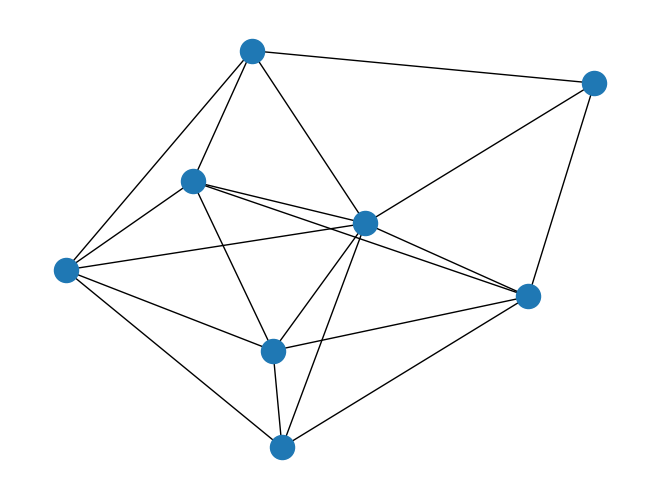

In [28]:
import networkx as nx

Graph = op.get_graph(edge_relation='C')

nx.draw(Graph)

In [29]:
dict_of_cliques = op.clique_cover(edge_relation='C')
print(dict_of_cliques)

{0:  0.446+0.000j III +
-0.057+0.000j ZIY +
 0.803+0.000j ZXI, 1: -1.332+0.000j IZI +
 1.047+0.000j IZZ +
-0.368+0.000j YII, 2:  0.245+0.000j IXX +
 1.259+0.000j YIX}


Try the above functions, but change edge relation to one of: 
- `C` = Pauli operators in clique must commute
- `AC` = Pauli operators in clique must anticommute
- `QWC` = Pauli operators in clique must qubitwise commute

We can also get the generators for a Pauli operator. For example:

In [30]:
P = PauliwordOp.from_dictionary({
'III': (1+0j),
 'IIZ': (1+0j),
 'IZI': (1+0j),
 'IZZ': (1+0j),
 'ZII': (1+0j),
 'ZIZ': (1+0j),
 'ZZI': (1+0j),
 'ZZZ': (1+0j),
 'IIX': (1+0j),
 'IXI': (1+0j),
 'IXX': (1+0j),
 'XII': (1+0j),
 'XIX': (1+0j),
 'XXI': (1+0j),
 'XXX': (1+0j)})


has the following generators:

In [31]:
P.generators

 1.000+0.000j IIZ +
 1.000+0.000j IZI +
 1.000+0.000j ZII +
 1.000+0.000j IIX +
 1.000+0.000j IXI +
 1.000+0.000j XII

We can get the Hermitian conjugate of an operator by using the `dagger`

In [32]:
op = PauliwordOp.from_dictionary(
    {
        'XX':1,
        'ZZ':2 + 1j,
        'YY':3 - 4j
    }
)
print(op)
print()
print(op.dagger)

 1.000+0.000j XX +
 2.000+1.000j ZZ +
 3.000-4.000j YY

 1.000-0.000j XX +
 2.000-1.000j ZZ +
 3.000+4.000j YY


We can use this to show a Haar random unitary is in fact unitary:

In [33]:
n_qubits= 2
haar_random = PauliwordOp.haar_random(n_qubits, 
                                disable_loading_bar=True)

haar_random * haar_random.dagger

 1.000+0.000j II

We can get the Hermitian conjugate of an operator by using the `dagger`

In [34]:
op = PauliwordOp.from_dictionary(
    {
        'XX':1,
        'ZZ':2 + 1j,
        'YY':3 - 4j
    }
)
print(op)
print()
print(op.dagger)

 1.000+0.000j XX +
 2.000+1.000j ZZ +
 3.000-4.000j YY

 1.000-0.000j XX +
 2.000-1.000j ZZ +
 3.000+4.000j YY


We can use this to show a Haar random unitary is in fact unitary:

In [35]:
n_qubits= 2
haar_random = PauliwordOp.haar_random(n_qubits, 
                                disable_loading_bar=True)

haar_random * haar_random.dagger

 1.000+0.000j II

## Attributes

Note the number of significant figures a Pauli operator is reported too by default is **3**:

In [36]:
P = PauliwordOp.from_dictionary(
    {
        'XX': 0.0001,
        'ZZ': 0.0001j,
    }
)
print(P)

 0.000+0.000j XX +
 0.000+0.000j ZZ


in order to increase this we need in increase `sigfig` attribute:

In [37]:
P.sigfig= 5
print(P)

 0.00010+0.00000j XX +
 0.00000+0.00010j ZZ


We can also access the coefficients of each Pauli operator via the coeff_vec attribute

In [38]:
print(P.coeff_vec)

[0.0001+0.j     0.    +0.0001j]


That returns a numpy array